In [1]:
import pandas as pd 
import numpy as np 
import operator
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import make_blobs, load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
employ = pd.read_csv("/Users/me./Desktop/Spring '22 /APP Analytics & P Modeling/Project/GetEmployedForum.csv")
# print(len(employ))
employ1 = employ.drop_duplicates() #drop duplicate rows
employ1 = employ1.replace(0, np.nan)
# employ1 = employ1.drop(columns = ['datePosted','pronoun','article','auxverb','adverb','conj','verb','adj','cogproc','informal'])

employ1 = employ1.dropna(axis = 0, thresh = 2, subset = ['posemo','negemo','anx','anger','sad','focuspast','focuspresent','focusfuture','work']) #drop rows where less than 2 columns are NaN values
ndf = employ1.replace(np.nan, 0) #return NaN as original 0 values 
# ndf = ndf.drop(columns = ['pronoun', 'article', 'auxverb', 'adverb', 'conj', 'verb', 'adj'])
ndf

,CommentContent,score,datePosted,pronoun,article,auxverb,adverb,conj,verb,adj,...,negemo,anx,anger,sad,cogproc,focuspast,focuspresent,focusfuture,work,informal
0,that s actually 20 jobs in a month lol i didn ...,1.0,2/16/2022 23:41,13.16,7.89,5.26,2.63,0.00,10.53,2.63,...,0.00,0.0,0.00,0.00,7.89,2.63,10.53,0.00,7.89,5.26
1,yeahh the shining shimmering splendid that is ...,1.0,2/16/2022 23:40,13.79,10.34,10.34,0.00,0.00,20.69,3.45,...,3.45,0.0,0.00,3.45,3.45,3.45,13.79,0.00,10.34,0.00
2,thank you my friend i really appreciate it,1.0,2/16/2022 19:53,50.00,0.00,0.00,12.50,0.00,12.50,0.00,...,0.00,0.0,0.00,0.00,25.00,0.00,12.50,0.00,0.00,0.00
3,first of all congratulations we all know how h...,1.0,2/16/2022 18:58,21.88,0.00,6.25,9.38,6.25,25.00,6.25,...,0.00,0.0,0.00,0.00,18.75,3.12,18.75,6.25,3.12,3.12
4,absolutely is a factor i had the same issue wh...,1.0,2/16/2022 16:03,5.88,13.73,9.80,5.88,3.92,19.61,5.88,...,0.00,0.0,0.00,0.00,7.84,5.88,11.76,1.96,5.88,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52690,i m not sure exactly the direction of this sub...,3.0,6/13/2012 16:25,19.05,9.52,11.90,4.76,7.14,21.43,4.76,...,0.00,0.0,0.00,0.00,23.81,2.38,14.29,0.00,2.38,0.00
52692,i literally can t do anything and this is how ...,7.0,6/13/2012 16:13,33.33,0.00,20.00,6.67,13.33,20.00,0.00,...,0.00,0.0,0.00,0.00,20.00,0.00,26.67,0.00,6.67,0.00
52693,i d like to counter this two years out of coll...,15.0,6/13/2012 16:02,9.93,3.97,10.60,4.64,6.62,13.25,7.28,...,0.00,0.0,0.00,0.00,9.93,0.66,10.60,1.32,8.61,0.66
52695,i can attest to this i make a fuck ton of mone...,6.0,6/13/2012 15:41,21.05,5.26,15.79,0.00,5.26,21.05,0.00,...,5.26,0.0,5.26,0.00,10.53,10.53,15.79,0.00,0.00,5.26


In [3]:
x = ndf.drop(columns = ['CommentContent','datePosted','score'])
y = ndf['score']

Text(0.5, 1.0, 'Score Correlation')

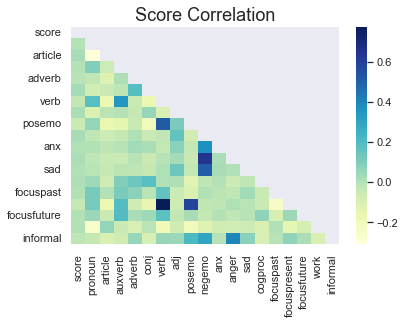

In [4]:
dowvs = sns.heatmap(ndf.corr(), cmap ='YlGnBu',  mask = np.triu(ndf.corr()))
plt.title('Score Correlation', fontsize = 18)

In [5]:
x.head()

,pronoun,article,auxverb,adverb,conj,verb,adj,posemo,negemo,anx,anger,sad,cogproc,focuspast,focuspresent,focusfuture,work,informal
0,13.16,7.89,5.26,2.63,0.00,10.53,2.63,7.89,0.00,0.0,0.0,0.00,7.89,2.63,10.53,0.00,7.89,5.26
1,13.79,10.34,10.34,0.00,0.00,20.69,3.45,10.34,3.45,0.0,0.0,3.45,3.45,3.45,13.79,0.00,10.34,0.00
2,50.00,0.00,0.00,12.50,0.00,12.50,0.00,25.00,0.00,0.0,0.0,0.00,25.00,0.00,12.50,0.00,0.00,0.00
3,21.88,0.00,6.25,9.38,6.25,25.00,6.25,15.62,0.00,0.0,0.0,0.00,18.75,3.12,18.75,6.25,3.12,3.12
4,5.88,13.73,9.80,5.88,3.92,19.61,5.88,0.00,0.00,0.0,0.0,0.00,7.84,5.88,11.76,1.96,5.88,1.96


# Correlation

In [6]:
cor = ndf.corr()
corval = cor.values[0]
corkey = cor.keys()

# print(corval[0])
# print(corkey[0])
corr = {} 
for i in range(len(x.columns)):
    corr[corkey[i]] = corval[i]
sortcorr = (sorted(corr.items(), key = operator.itemgetter(1), reverse = True))
print('Correlation Sorted\n')

print('Column Name   Value')
print('_________________________')
for i in range(1,11):
    print(sortcorr[i][0]+ (' ' * (12 - len(sortcorr[i][0])))+ ' : '+str(round(sortcorr[i][1], 5)))

Correlation Sorted

Column Name   Value
_________________________
conj         : 0.02793
article      : 0.02411
negemo       : 0.02241
adj          : 0.01537
anger        : 0.01394
cogproc      : 0.0114
sad          : 0.00461
anx          : 0.00399
work         : 0.00267
focusfuture  : 0.00071


# STD Random Forrest Cross val

In [7]:
corrvals = []
for i in range(1,11): 
    corrvals.append(sortcorr[i][0])

corrX= ndf[['conj','article','negemo','adj','anger','cogproc','sad','anx','work','focusfuture']].copy()

# 'conj','article','negemo','adj', 
stdx = StandardScaler().fit_transform(x)
rf = RandomForestClassifier(max_depth = 4, random_state=100)

# print('Random Forrest Cross Val Score:\n')
print(np.mean(cross_val_score(rf,stdx, y, cv = 5)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.5835224884405212


# PCA Random Forrest Cross Val

In [8]:
pca = PCA()
pca.fit(x)
print(pca.explained_variance_ratio_.cumsum())

[0.33866471 0.46503849 0.56355455 0.65514085 0.71132883 0.75582118
 0.79690733 0.83664399 0.87335894 0.90312576 0.92778678 0.94951971
 0.96654222 0.98125067 0.98923948 0.99576938 0.99903101 1.        ]


In [9]:
pca = PCA(n_components = 10)
pcax = pca.fit_transform(x)
rfc = RandomForestClassifier(max_depth = 4, random_state= 100)

print(np.mean(cross_val_score(rfc, pcax, y, cv =5)))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.5835224884405212


# KNN 

Accuracy Score

In [10]:
stddf = pd.DataFrame(stdx, columns = list(x.columns)) 

xtrain, xtest, ytrain, ytest = train_test_split(stddf, y, test_size= 0.5, random_state=100)
knn = KNeighborsClassifier().fit(xtrain, ytrain)
ypred = knn.predict(xtest)
acc_knn = accuracy_score(ytest, ypred)
print('KNN Accuracy Score: '+ str(acc_knn))

KNN Accuracy Score: 0.5298865069356873


Cross Value Score

In [11]:
xval =[]
yval= []

for k in range(3,11):
    xval.append(k)
    knn = KNeighborsClassifier(n_neighbors= k) 
    yval.append(round(np.mean(cross_val_score(knn, stddf, y, cv =5)), 2))
print(yval)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/opt/anaconda3/lib/python3.9/site-packages/s

[0.49, 0.51, 0.52, 0.53, 0.54, 0.55, 0.55, 0.56]


Plot KNN

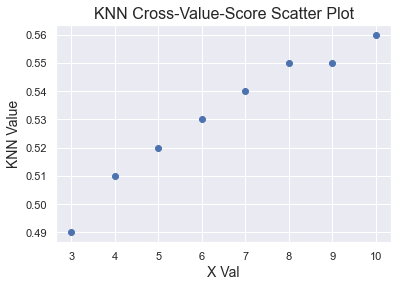

In [12]:
plt.scatter(xval,yval)
plt.title('KNN Cross-Value-Score Scatter Plot', fontsize = 16)
plt.xlabel('X Val', fontsize = 14)
plt.ylabel('KNN Value', fontsize = 14)
plt.show()